In [1]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
try:
    sys.path.append('/home/piotr/CodeProjects/MhcEvo2000/PyScripts/')
except:
    sys.path.append('/home/piotr/CodeProjects/mhcevolution/PyScripts/')
import sex_selection_on_MHC_numb as ssmn

In [14]:
cd /media/piotr/Elements/MHC_UAM/sexSelectNew/

/media/piotr/Elements/MHC_UAM/sexSelectNew


In [27]:
df_1 = pd.read_csv("/media/piotr/Elements/MHC_UAM/sexSelectNew/Integr_1e5.csv")
df_5 = pd.read_csv("/media/piotr/Elements/MHC_UAM/sexSelectNew/Integr_5e5.csv")

In [28]:
df_1.dtypes

patho_spp       int64
SEXSELECT      object
meanAllel     float64
stdAllel      float64
slope         float64
indvMean      float64
indvSTD       float64
meanFitt      float64
meanCvFitt    float64
meanPatho     float64
stdPato       float64
dtype: object

In [29]:
ax_label = 26
T_label = 30
TicksFS = 24

In [30]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}
def plotBox(what, df, patho_mut, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="patho_spp", data=df, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="Patho. spp.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))
    #plt.tight_layout()
    #plt.savefig(str(patho_mut) + "." + what + ".png")
    #plt.show()

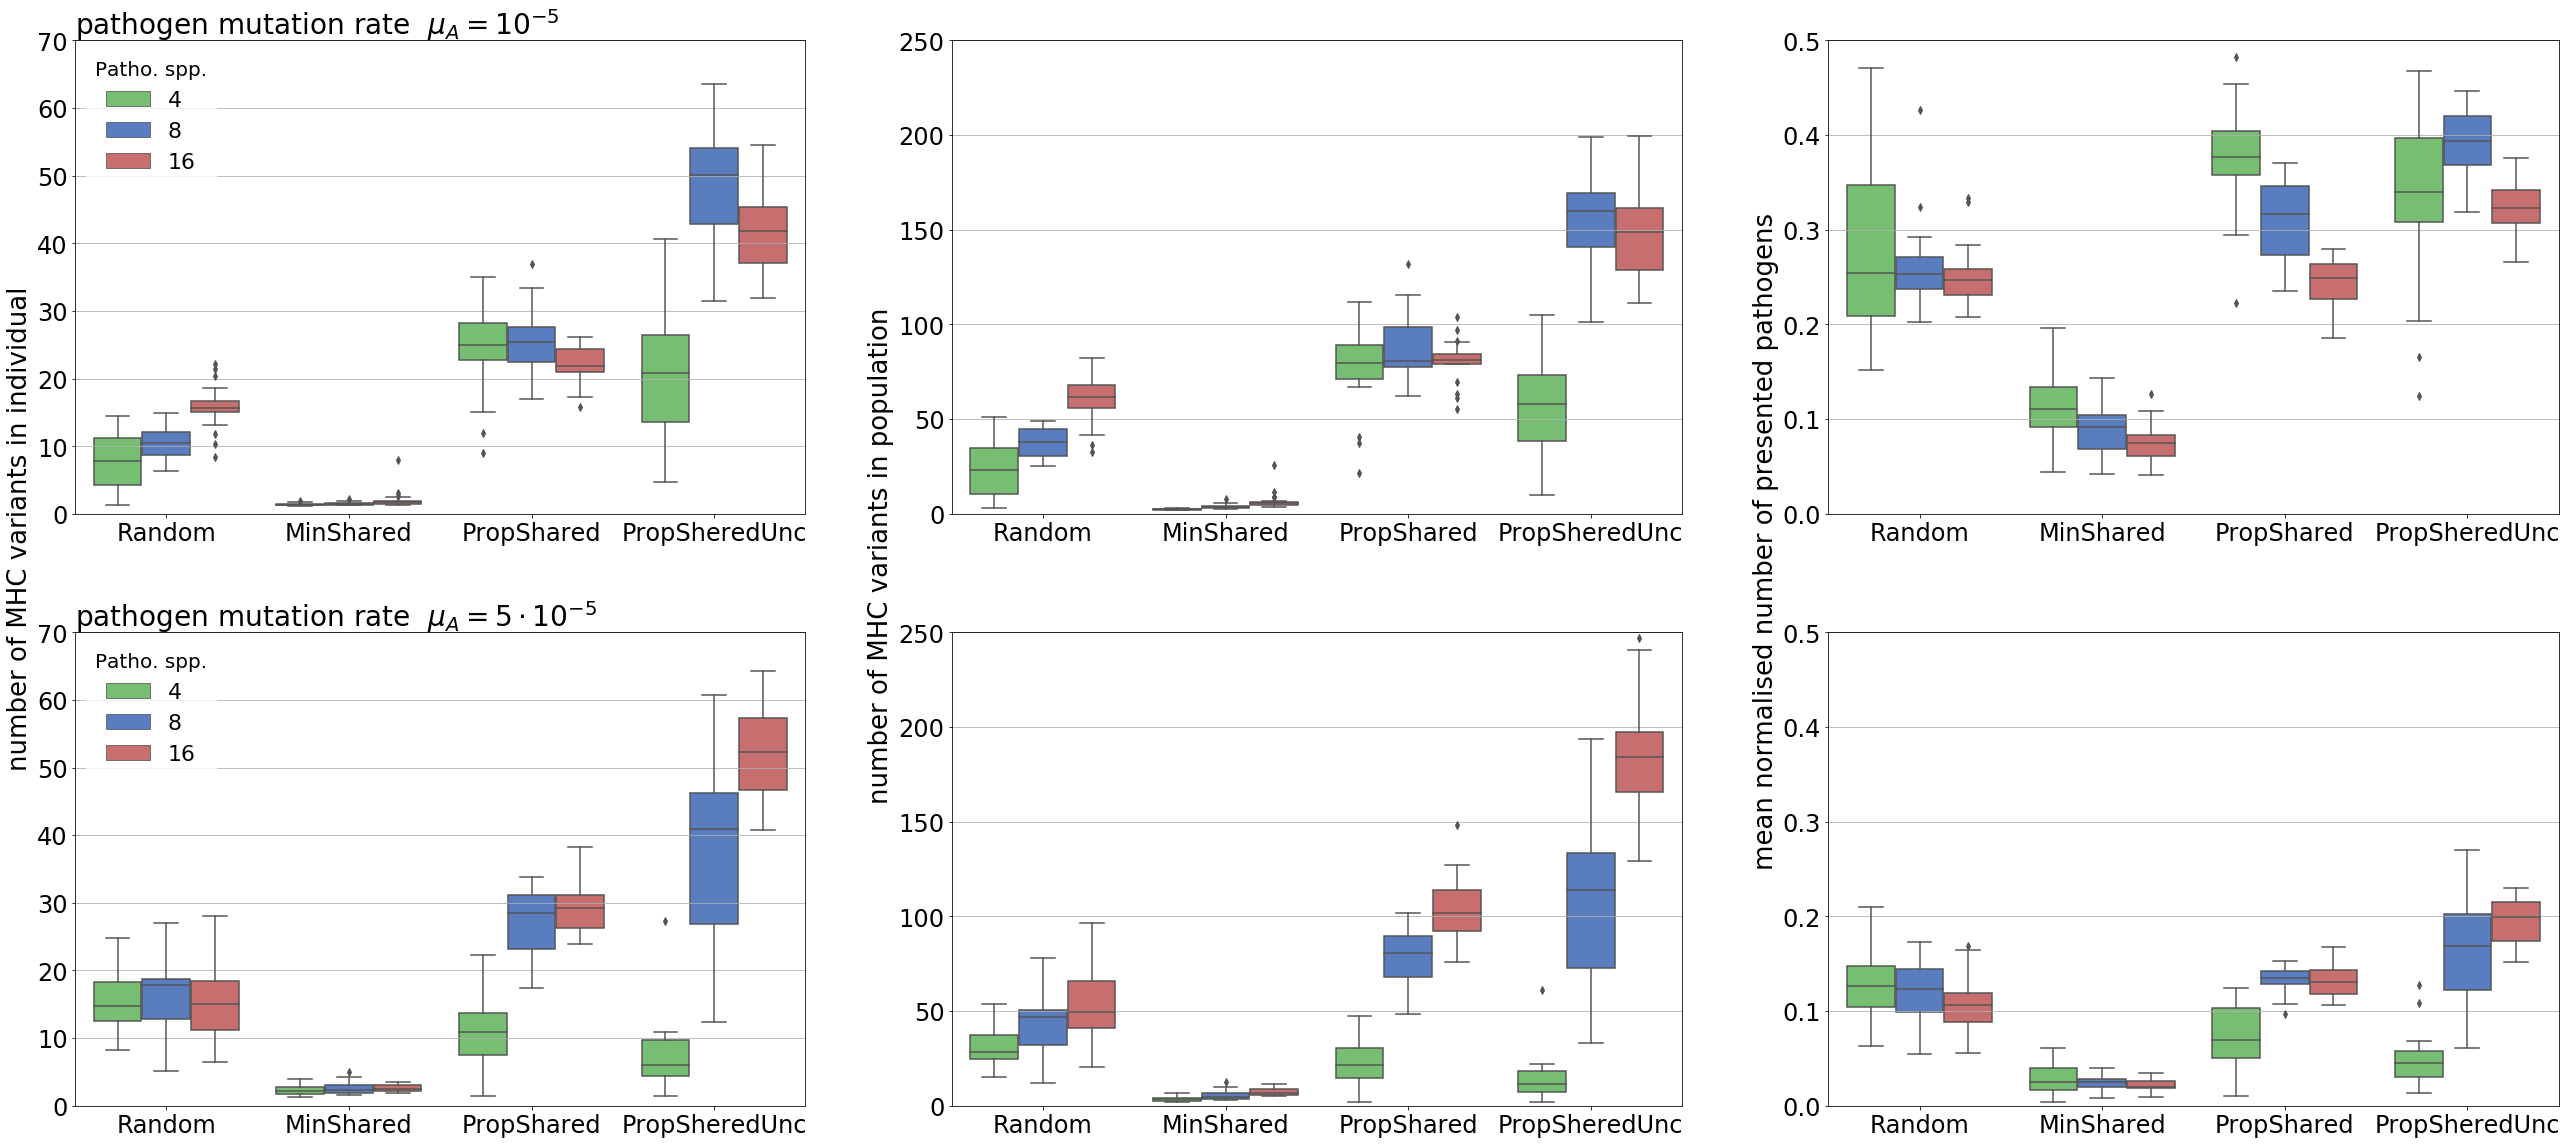

In [31]:
plt.figure(figsize=(36,16))

patho_mut = 0.00001
plt.subplot(231)
what = "indvMean"
plotBox(what, df_1, patho_mut, 70, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("number of MHC variants in individual", fontsize=ax_label)
plt.subplot(232)
what = "meanAllel"
plotBox(what, df_1, patho_mut, 250, False)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label)
plt.subplot(233)
what = "meanPatho"
plotBox(what, df_1, patho_mut, 0.5, False)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(234)
what = "indvMean"
plotBox(what, df_5, patho_mut, 70, True)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')
plt.subplot(235)
what = "meanAllel"
plotBox(what, df_5, patho_mut, 250, False)
plt.ylabel("        number of MHC variants in population", fontsize=ax_label, horizontalalignment='left')
plt.subplot(236)
what = "meanPatho"
plotBox(what, df_5, patho_mut, 0.5, False)
plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label, horizontalalignment='left')
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("sexSelectComprFull.png")
plt.show()